In [165]:
# Import Libraries
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [166]:
# Extract data
marketData = pd.read_csv('../../ETL/Load/marketData.csv', header=(0), sep=';')
MLP_results = pd.read_csv('MLP_test_results.csv', header=(0), sep=';')
anfis_results = pd.read_csv('anfis_test_results.csv', header=(0), sep=';')

# Convert Date to pd.Datetime
marketData['DATE'] = pd.to_datetime(marketData['DATE'])
MLP_results['DATE'] = pd.to_datetime(MLP_results['DATE'])
anfis_results['DATE'] = pd.to_datetime(anfis_results['DATE'])

In [167]:
marketData

,TICKER,DATE,CLOSE,FUTURE_CLOSE,APPRECIATION
0,BOVA11.SA,2013-01-01,58.689999,46.459999,-0.208383
1,BOVA11.SA,2013-02-01,56.139999,46.080002,-0.179195
2,BOVA11.SA,2013-03-01,55.099998,49.090000,-0.109074
3,BOVA11.SA,2013-04-01,54.450001,50.290001,-0.076400
4,BOVA11.SA,2013-05-01,52.450001,49.980000,-0.047092
...,...,...,...,...,...
127,BOVA11.SA,2023-08-01,112.309998,132.600006,0.180661
128,BOVA11.SA,2023-09-01,113.150002,128.429993,0.135042
129,BOVA11.SA,2023-10-01,109.620003,126.260002,0.151797
130,BOVA11.SA,2023-11-01,123.570000,122.320000,-0.010116


In [168]:
MLP_results

,TICKER,DATE,PE,BVPS,ROE,DPR,DY,PBR,CA,GROSS_DEBT,ANS,CURRENT_RATIO,EPS,APPRECIATION,CLASS,SIGNAL,CLASS_PRED
0,ALOS3,2023-11-01,59.120586,20.860601,0.028201,0.459067,0.007765,1.667289,3.265974e+09,0.000000e+00,3.776033e+08,3.215209,0.58830,-0.183201,0,-0.421959,0
1,ALOS3,2023-12-01,61.362452,20.860601,0.028201,0.459067,0.007481,1.730512,3.265974e+09,0.000000e+00,3.776033e+08,3.215209,0.58830,-0.262927,0,-0.408334,1
2,AMER3,2023-01-01,64.440693,21.069509,0.034177,-0.000000,-0.000000,2.202412,2.191289e+10,1.234075e+10,7.551659e+08,1.643033,0.72010,-0.531429,0,-0.624067,0
3,AMER3,2023-02-01,36.823253,21.069509,0.034177,-0.000000,-0.000000,1.258521,2.191289e+10,1.234075e+10,7.551659e+08,1.643033,0.72010,-0.490000,0,-0.651198,0
4,AMER3,2023-03-01,36.823253,21.069509,0.034177,-0.000000,-0.000000,1.258521,2.191289e+10,1.234075e+10,7.551659e+08,1.643033,0.72010,-0.350000,0,-0.651198,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,YDUQ3,2023-08-01,-102.086973,10.561267,-0.018731,-0.677386,0.006635,1.912161,2.100461e+09,5.040497e+09,2.802750e+08,1.896389,-0.19782,-0.501691,0,-0.955408,0
1967,YDUQ3,2023-09-01,-99.581156,10.561267,-0.018731,-0.677386,0.006802,1.865226,2.100461e+09,5.040497e+09,2.802750e+08,1.896389,-0.19782,-0.529218,0,-0.947412,0
1968,YDUQ3,2023-10-01,-88.856255,10.561267,-0.018731,-0.677386,0.007623,1.664341,2.100461e+09,5.040497e+09,2.802750e+08,1.896389,-0.19782,-0.390872,0,-0.888526,0
1969,YDUQ3,2023-11-01,-100.683712,10.561267,-0.018731,-0.677386,0.006728,1.885877,2.100461e+09,5.040497e+09,2.802750e+08,1.896389,-0.19782,-0.531334,0,-0.951124,0


In [169]:
anfis_results

,TICKER,DATE,PE,BVPS,ROE,DPR,DY,PBR,CA,GROSS_DEBT,ANS,CURRENT_RATIO,EPS,APPRECIATION,CLASS,SIGNAL,CLASS_PRED
0,ALOS3,2023-11-01,59.120586,20.860601,0.028201,0.459067,0.007765,1.667289,3.265974e+09,0.000000e+00,3.776033e+08,3.215209,0.58830,-0.183201,0,0.511462,1
1,ALOS3,2023-12-01,61.362452,20.860601,0.028201,0.459067,0.007481,1.730512,3.265974e+09,0.000000e+00,3.776033e+08,3.215209,0.58830,-0.262927,0,0.513814,1
2,AMER3,2023-01-01,64.440693,21.069509,0.034177,-0.000000,-0.000000,2.202412,2.191289e+10,1.234075e+10,7.551659e+08,1.643033,0.72010,-0.531429,0,0.634505,1
3,AMER3,2023-02-01,36.823253,21.069509,0.034177,-0.000000,-0.000000,1.258521,2.191289e+10,1.234075e+10,7.551659e+08,1.643033,0.72010,-0.490000,0,0.597581,1
4,AMER3,2023-03-01,36.823253,21.069509,0.034177,-0.000000,-0.000000,1.258521,2.191289e+10,1.234075e+10,7.551659e+08,1.643033,0.72010,-0.350000,0,0.597581,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,YDUQ3,2023-08-01,-102.086973,10.561267,-0.018731,-0.677386,0.006635,1.912161,2.100461e+09,5.040497e+09,2.802750e+08,1.896389,-0.19782,-0.501691,0,0.473750,0
1967,YDUQ3,2023-09-01,-99.581156,10.561267,-0.018731,-0.677386,0.006802,1.865226,2.100461e+09,5.040497e+09,2.802750e+08,1.896389,-0.19782,-0.529218,0,0.476298,0
1968,YDUQ3,2023-10-01,-88.856255,10.561267,-0.018731,-0.677386,0.007623,1.664341,2.100461e+09,5.040497e+09,2.802750e+08,1.896389,-0.19782,-0.390872,0,0.487410,0
1969,YDUQ3,2023-11-01,-100.683712,10.561267,-0.018731,-0.677386,0.006728,1.885877,2.100461e+09,5.040497e+09,2.802750e+08,1.896389,-0.19782,-0.531334,0,0.475175,0


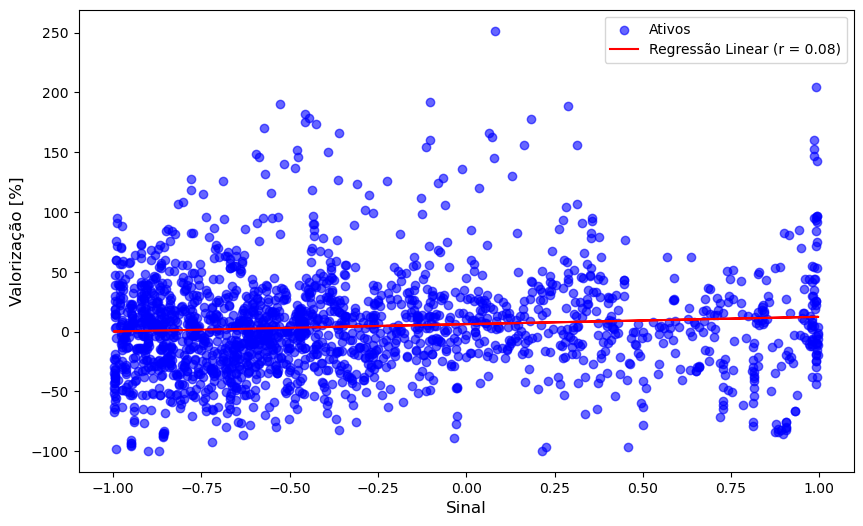

In [170]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(MLP_results['SIGNAL'], MLP_results['APPRECIATION']*100, color='blue', alpha=0.6, label='Ativos')

# Fit a line using linear regression
slope, intercept, r_value_mlp, p_value, std_err = linregress(MLP_results['SIGNAL'], MLP_results['APPRECIATION']*100)
best_fit_line = slope * MLP_results['SIGNAL'] + intercept

# Plot the best-fit line
plt.plot(MLP_results['SIGNAL'], best_fit_line, color='red', label=f'Regressão Linear (r = {r_value_mlp:.2f})')

# Adding labels and title
plt.xlabel('Sinal', fontsize=12)
plt.ylabel('Valorização [%]', fontsize=12)
plt.legend()

# Save results
output_dir = 'Graphs'
plt.savefig(os.path.join(output_dir, f'appreciationXsignal_mlp.png'))

# Display the plot
plt.show()

In [171]:
print(f'MLP R-Value: {r_value_mlp}')

MLP R-Value: 0.0810314708897494


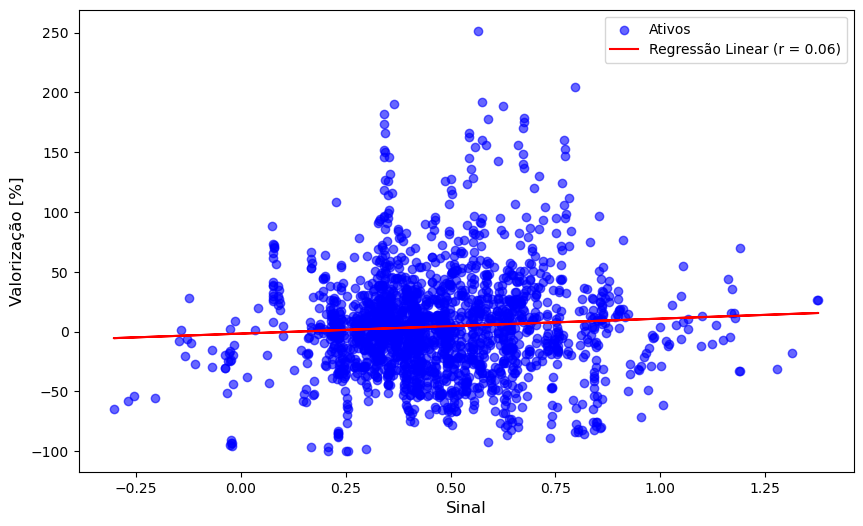

In [172]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(anfis_results['SIGNAL'], anfis_results['APPRECIATION']*100, color='blue', alpha=0.6, label='Ativos')

# Fit a line using linear regression
slope, intercept, r_value_anfis, p_value, std_err = linregress(anfis_results['SIGNAL'], anfis_results['APPRECIATION']*100)
best_fit_line = slope * anfis_results['SIGNAL'] + intercept

# Plot the best-fit line
plt.plot(anfis_results['SIGNAL'], best_fit_line, color='red', label=f'Regressão Linear (r = {r_value_anfis:.2f})')

# Adding labels and title
plt.xlabel('Sinal', fontsize=12)
plt.ylabel('Valorização [%]', fontsize=12)
plt.legend()

# Save results
output_dir = 'Graphs'
plt.savefig(os.path.join(output_dir, f'appreciationXsignal_anfis.png'))

# Display the plot
plt.show()

In [173]:
print(f'Anfis R-Value: {r_value_anfis}')

Anfis R-Value: 0.06183270902786571


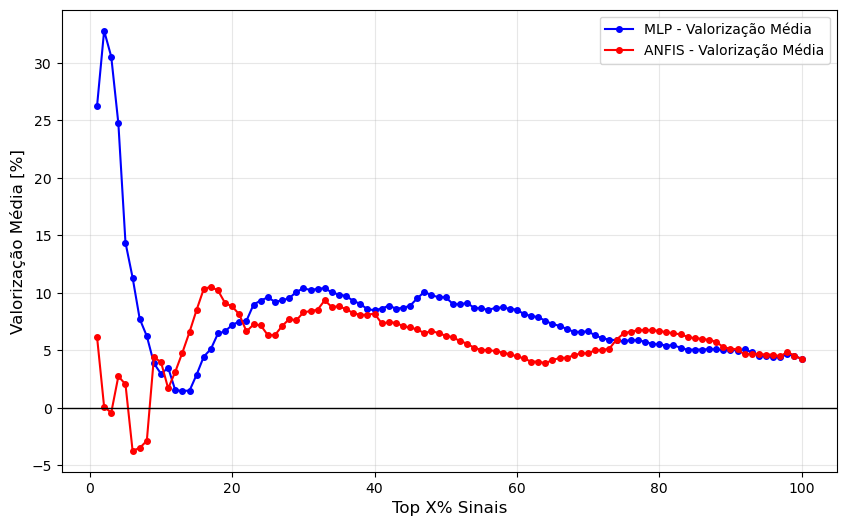

In [174]:
# Sort the DataFrame by 'SIGNAL' in descending order
MLP_results_sorted = MLP_results.sort_values(by='SIGNAL', ascending=False).reset_index(drop=True).copy()
anfis_results_sorted = anfis_results.sort_values(by='SIGNAL', ascending=False).reset_index(drop=True).copy()

# Calculate top X percentages and corresponding average appreciation
percentages = np.linspace(0, 100, 101)  # From 0% to 100% in steps of 1%

MPL_average_appreciations = [
    MLP_results_sorted['APPRECIATION'][:int(len(MLP_results_sorted) * (p / 100))].mean()
    for p in percentages
]

anfis_average_appreciations = [
    anfis_results_sorted['APPRECIATION'][:int(len(anfis_results_sorted) * (p / 100))].mean()
    for p in percentages
]


# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(percentages, [x*100 for x in MPL_average_appreciations], color='blue', marker='o', markersize=4, label='MLP - Valorização Média')
plt.plot(percentages, [x*100 for x in anfis_average_appreciations], color='red', marker='o', markersize=4, label='ANFIS - Valorização Média')

# Add labels, title, and legend
plt.xlabel('Top X% Sinais', fontsize=12)
plt.ylabel('Valorização Média [%]', fontsize=12)
plt.legend()

# Add a bold line at y=0
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

# Display the plot
plt.grid(alpha=0.3)

plt.savefig(os.path.join(output_dir, f'appreciationXtopsignals.png'))

plt.show()

In [175]:
# Initialize an empty DataFrame to store results
results_list = []

for year in [2022, 2023]:
    for month in range(1,13):
        ref_date = MLP_results[(MLP_results['DATE'].dt.year == year) & (MLP_results['DATE'].dt.month == month)]['DATE'].iloc[0]
        MLP_avg_appreciation = MLP_results[(MLP_results['CLASS_PRED']==1) &
                               (MLP_results['DATE'].dt.year == year) & (MLP_results['DATE'].dt.month == month)]['APPRECIATION'].mean()
        anfis_avg_appreciation = anfis_results[(anfis_results['CLASS_PRED']==1) &
                               (anfis_results['DATE'].dt.year == year) & (anfis_results['DATE'].dt.month == month)]['APPRECIATION'].mean()
        market_avg_appreciation = marketData[(marketData['DATE'].dt.year == year) & (marketData['DATE'].dt.month == month)]['APPRECIATION'].mean()


        # Append the results to the DataFrame
        results_list.append({
                            'DATE': ref_date,
                            'MLP': MLP_avg_appreciation,
                            'ANFIS': anfis_avg_appreciation,
                            'MARKET': market_avg_appreciation
                            })
        
# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)

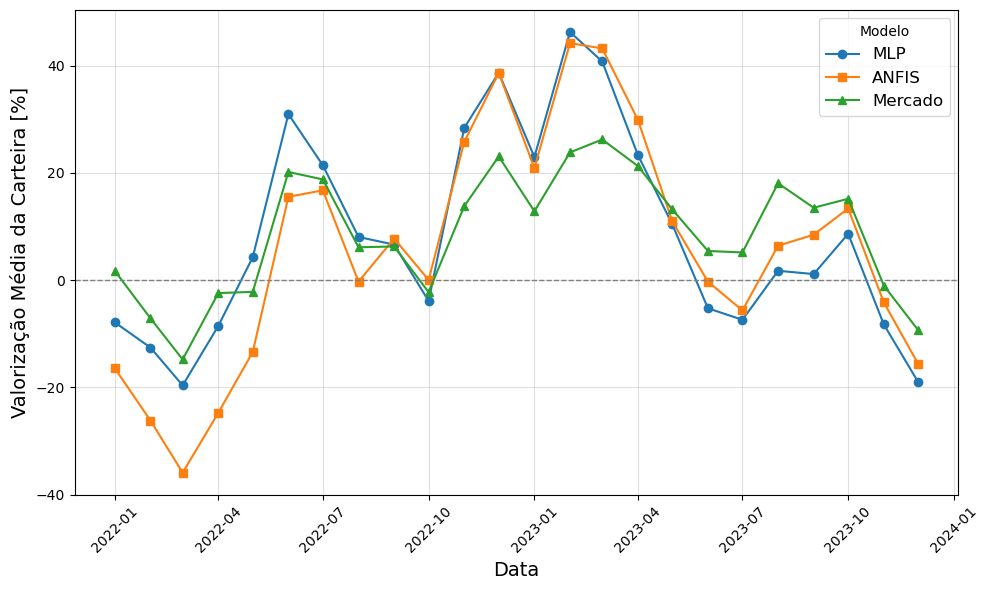

In [176]:
# Ensure the 'DATE' column is sorted for proper plotting
results_df = results_df.sort_values(by='DATE')

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot lines for each column
plt.plot(results_df['DATE'], results_df['MLP']*100, label='MLP', marker='o')
plt.plot(results_df['DATE'], results_df['ANFIS']*100, label='ANFIS', marker='s')
plt.plot(results_df['DATE'], results_df['MARKET']*100, label='Mercado', marker='^')

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Add titles and labels
plt.xlabel('Data', fontsize=14)
plt.ylabel('Valorização Média da Carteira [%]', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(title='Modelo', fontsize=12)

# Show grid for better visualization
plt.grid(alpha=0.4)

# Show the plot
plt.tight_layout()

plt.savefig(os.path.join(output_dir, f'average_appreciationXmarket.png'))

plt.show()

In [177]:
# Average appreciation prints:

results_df_mlp = results_df["MLP"].mean()*100
results_df_anfis = results_df["ANFIS"].mean()*100

print(f'Average MLP portfolio appreciation: {results_df_mlp:.3f}%')
print(f'Average ANFIS portfolio appreciation: {results_df_anfis:.3f}%')
print(f'Average Market ETF appreciation: {results_df["MARKET"].mean()*100:.3f}%')

Average MLP portfolio appreciation: 8.384%
Average ANFIS portfolio appreciation: 5.802%
Average Market ETF appreciation: 8.565%


In [178]:
# Portfolios outperforming the market
print(f'MLP Portfolios Outperforming the Market: {sum(results_df["MLP"]>results_df["MARKET"])}/{len(results_df["MARKET"])}')
print(f'ANFIS Portfolios Outperforming the Market: {sum(results_df["ANFIS"]>results_df["MARKET"])}/{len(results_df["MARKET"])}')

MLP Portfolios Outperforming the Market: 11/24
ANFIS Portfolios Outperforming the Market: 8/24


In [179]:
techdata = pd.read_csv('../../ETL/Load/stockData.csv', decimal='.', sep=';', encoding='ISO-8859-1').head(10)

In [180]:
techdata

,TICKER,DATE,PE,BVPS,ROE,DPR,DY,PBR,CA,GROSS_DEBT,ANS,CURRENT_RATIO,EPS,APPRECIATION,CLASS
0,ABEV3,2014-07-01,21.706832,2.906275,0.258062,0.634963,0.029252,5.601715,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75,0.376079,0
1,ABEV3,2014-08-01,22.676506,2.906275,0.258062,0.634963,0.028001,5.851952,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75,0.278858,0
2,ABEV3,2014-09-01,22.219375,2.906275,0.258062,0.634963,0.028577,5.733983,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75,0.327730,0
3,ABEV3,2014-10-01,22.718062,2.906275,0.258062,0.634963,0.027950,5.862676,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75,0.286358,0
4,ABEV3,2014-11-01,23.216752,2.906275,0.258062,0.634963,0.027349,5.991369,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75,0.211723,0
5,ABEV3,2014-12-01,22.648801,2.906275,0.258062,0.634963,0.028035,5.844802,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75,0.189465,0
6,ABEV3,2015-01-01,24.505033,2.906275,0.258062,0.634963,0.025912,6.323825,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75,0.158909,0
7,ABEV3,2015-02-01,25.363885,2.906275,0.258062,0.634963,0.025034,6.545463,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75,-0.010854,0
8,ABEV3,2015-03-01,25.599377,2.906275,0.258062,0.634963,0.024804,6.606234,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75,0.051822,0
9,ABEV3,2015-04-01,26.250446,2.906275,0.258062,0.634963,0.024189,6.774251,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75,0.052726,0


In [181]:
from IPython.display import display, HTML

# Gerar HTML com largura total
html_table = techdata.to_html(max_cols=None)
display(HTML(html_table))

,TICKER,DATE,PE,BVPS,ROE,DPR,DY,PBR,CA,GROSS_DEBT,ANS,CURRENT_RATIO,EPS,APPRECIATION,CLASS
0,ABEV3,2014-07-01,21.706832,2.906275,0.258062,0.634963,0.029252,5.601715,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75,0.376079,0
1,ABEV3,2014-08-01,22.676506,2.906275,0.258062,0.634963,0.028001,5.851952,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75,0.278858,0
2,ABEV3,2014-09-01,22.219375,2.906275,0.258062,0.634963,0.028577,5.733983,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75,0.327730,0
3,ABEV3,2014-10-01,22.718062,2.906275,0.258062,0.634963,0.027950,5.862676,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75,0.286358,0
4,ABEV3,2014-11-01,23.216752,2.906275,0.258062,0.634963,0.027349,5.991369,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75,0.211723,0
5,ABEV3,2014-12-01,22.648801,2.906275,0.258062,0.634963,0.028035,5.844802,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75,0.189465,0
6,ABEV3,2015-01-01,24.505033,2.906275,0.258062,0.634963,0.025912,6.323825,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75,0.158909,0
7,ABEV3,2015-02-01,25.363885,2.906275,0.258062,0.634963,0.025034,6.545463,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75,-0.010854,0
8,ABEV3,2015-03-01,25.599377,2.906275,0.258062,0.634963,0.024804,6.606234,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75,0.051822,0
9,ABEV3,2015-04-01,26.250446,2.906275,0.258062,0.634963,0.024189,6.774251,2.047001e+10,2.894055e+09,1.513876e+10,1.191462,0.75,0.052726,0


In [101]:
# Exportar o DataFrame para um arquivo HTML
# techdata.to_html("tabela.html")

# Abrir no navegador (manualmente ou com Python)
# import webbrowser
# webbrowser.open("tabela.html")

In [102]:
# Aplicar estilos ao DataFrame
# styled_df = data_cleaned.style.set_table_styles(
#     [
#         {"selector": "thead th", "props": [("background-color", "#D3D3D3"), ("color", "black"), ("font-weight", "bold"), ("font-family", "monospace")]},
#         {"selector": "tbody tr:nth-child(even)", "props": [("background-color", "#f2f2f2"), ("font-family", "monospace")]},
#         {"selector": "tbody tr:nth-child(odd)", "props": [("background-color", "white"), ("font-family", "monospace")]},
#     ]
# ).set_properties(**{"text-align": "center", "font-family": "monospace"})

# Exportar para HTML
# styled_df.to_html("tabela_estilizada.html", index=False)

# Abrir no navegador
# webbrowser.open("tabela_estilizada.html")